In [7]:
# import python packages needed
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import sklearn as sk

In [8]:
# create our connection to the API
client_id = 'd68f914c2f9942988e7d9517aebffcb3' # client id
client_secret = '7bc6f8d4791f45ac893408f0fb980cdb' # client secret
username = "megraswan" # username

In [9]:
# connect
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
pl_id = 'spotify:playlist:1kthr7VG9a1oGC4bQixTas'
offset = 0

while True:
    response = sp.playlist_items(pl_id,
                                 offset=offset,
                                 fields='items.track.id,items.track.valence',
                                 additional_types=['track'])
    
    if len(response['items']) == 0:
        break
    
    pprint(response['items'])
    offset = offset + len(response['items'])
    print(offset, "/", response['total'])

[{'track': {'id': '1JSTJqkT5qHq8MDJnJbRE1'}},
 {'track': {'id': '3fH4KjXFYMmljxrcGrbPj9'}},
 {'track': {'id': '2WfaOiMkCvy7F5fcp2zZ8L'}},
 {'track': {'id': '0J6mQxEZnlRt9ymzFntA6z'}},
 {'track': {'id': '0KMGxYKeUzK9wc5DZCt3HT'}},
 {'track': {'id': '3wfujdbamR3Z46F4xav7LM'}},
 {'track': {'id': '7G7tgVYORlDuVprcYHuFJh'}},
 {'track': {'id': '6N7gPTru90HYLRUIVDQ185'}},
 {'track': {'id': '4m2GdLuOhDt6rFbgOFMHIL'}},
 {'track': {'id': '0WQiDwKJclirSYG9v5tayI'}},
 {'track': {'id': '5fnOrhQ4KgT5irGCjIccGH'}},
 {'track': {'id': '1yg7fwwYmx9DQ2TdXUmfpJ'}},
 {'track': {'id': '0a4agFmqHXxcZl1nho1BxM'}},
 {'track': {'id': '6xdLJrVj4vIXwhuG8TMopk'}},
 {'track': {'id': '5tawGZuoaKGinhLIn9U5X4'}},
 {'track': {'id': '4NnWuGQujzWUEg0uZokO5M'}},
 {'track': {'id': '3OeUlriM0EZHdWleJtjoVr'}},
 {'track': {'id': '1JLn8RhQzHz3qDqsChcmBl'}},
 {'track': {'id': '254bXAqt3zP6P50BdQvEsq'}},
 {'track': {'id': '4HA2jo7wkMdN1lmLO6ryzE'}},
 {'track': {'id': '1Jj6MF0xDOMA3Ut2Z368Bx'}},
 {'track': {'id': '6eDYgjKl4vUgRus

In [50]:
pl_id = 'spotify:playlist:1kthr7VG9a1oGC4bQixTas'

response = sp.playlist_items(pl_id,
                                limit=1,
                                offset=0, 
                                fields='total',
                                additional_types=['track'])
total_num_tracks = response['total']

offset = 0
limit = 100
# print(total_num_tracks, int(total_num_tracks/limit))

# features_all_tracks = []
dfs = []
for n in range(int(total_num_tracks/limit)+1):
    response = sp.playlist_items(pl_id,
                                limit=limit,
                                offset=offset, 
                                fields='items.track.id,items.track.name,items.track.artist,items.track.track_number,items.track.duration_ms,items.track.id,total',
                                additional_types=['track'])

    # pprint(response)
    track_ids = []
    tracks = []    
    for item in response['items']:
        track_ids.append(item['track']['id'])
        track_info = {  "name":item['track']['name'],
                        "duration_ms":item['track']['duration_ms'],
                        "track_number":item['track']['track_number']    }
        tracks.append(track_info)
        # tracks.append({"artist":item['track']['artist']})

    features = sp.audio_features(tracks=track_ids)

    # print(len(tracks))
    for idx in range(len(tracks)):
        # print(idx)
        tracks[idx].update(features[idx]) 

    df = pd.DataFrame(tracks)
    dfs.append(df)
    # features_all_tracks.extend(features) 
    # pprint(features)

    if len(response['items']) == 0:
        break

    offset = offset + len(response['items'])
    print(offset, "/", response['total'])
    # break

# Put all songs in 1 DataFrame
# dfs = []
# for person in songs_df:
#   for i in person:
#     df = pd.DataFrame(person[i])
#     dfs.append(df)
df_combo = pd.concat(dfs)
df_combo.head()

100 / 907
200 / 907
300 / 907
400 / 907
500 / 907
600 / 907
700 / 907
800 / 907
900 / 907
907 / 907


,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Every Breath You Take,253920,7,0.820,0.452,1,-9.796,1,0.0348,0.5430,0.002940,0.0714,0.740,117.401,audio_features,1JSTJqkT5qHq8MDJnJbRE1,spotify:track:1JSTJqkT5qHq8MDJnJbRE1,https://api.spotify.com/v1/tracks/1JSTJqkT5qHq...,https://api.spotify.com/v1/audio-analysis/1JST...,4
1,Don't You (Forget About Me),263040,1,0.660,0.816,2,-6.610,1,0.0299,0.1680,0.018100,0.0608,0.678,111.346,audio_features,3fH4KjXFYMmljxrcGrbPj9,spotify:track:3fH4KjXFYMmljxrcGrbPj9,https://api.spotify.com/v1/tracks/3fH4KjXFYMml...,https://api.spotify.com/v1/audio-analysis/3fH4...,4
2,Take on Me,225280,1,0.573,0.902,6,-7.638,0,0.0540,0.0180,0.001250,0.0928,0.876,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,4
3,Livin' On A Prayer,249293,3,0.534,0.887,0,-3.777,1,0.0345,0.0768,0.000099,0.3250,0.720,122.494,audio_features,0J6mQxEZnlRt9ymzFntA6z,spotify:track:0J6mQxEZnlRt9ymzFntA6z,https://api.spotify.com/v1/tracks/0J6mQxEZnlRt...,https://api.spotify.com/v1/audio-analysis/0J6m...,4
4,If You Leave Me Now,235373,4,0.434,0.563,11,-6.784,1,0.0268,0.0197,0.000824,0.1280,0.275,104.183,audio_features,0KMGxYKeUzK9wc5DZCt3HT,spotify:track:0KMGxYKeUzK9wc5DZCt3HT,https://api.spotify.com/v1/tracks/0KMGxYKeUzK9...,https://api.spotify.com/v1/audio-analysis/0KMG...,4


In [55]:
df_combo

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Every Breath You Take,253920,7,0.820,0.452,1,-9.796,1,0.0348,0.543000,0.002940,0.0714,0.740,117.401,audio_features,1JSTJqkT5qHq8MDJnJbRE1,spotify:track:1JSTJqkT5qHq8MDJnJbRE1,https://api.spotify.com/v1/tracks/1JSTJqkT5qHq...,https://api.spotify.com/v1/audio-analysis/1JST...,4
1,Don't You (Forget About Me),263040,1,0.660,0.816,2,-6.610,1,0.0299,0.168000,0.018100,0.0608,0.678,111.346,audio_features,3fH4KjXFYMmljxrcGrbPj9,spotify:track:3fH4KjXFYMmljxrcGrbPj9,https://api.spotify.com/v1/tracks/3fH4KjXFYMml...,https://api.spotify.com/v1/audio-analysis/3fH4...,4
2,Take on Me,225280,1,0.573,0.902,6,-7.638,0,0.0540,0.018000,0.001250,0.0928,0.876,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,4
3,Livin' On A Prayer,249293,3,0.534,0.887,0,-3.777,1,0.0345,0.076800,0.000099,0.3250,0.720,122.494,audio_features,0J6mQxEZnlRt9ymzFntA6z,spotify:track:0J6mQxEZnlRt9ymzFntA6z,https://api.spotify.com/v1/tracks/0J6mQxEZnlRt...,https://api.spotify.com/v1/audio-analysis/0J6m...,4
4,If You Leave Me Now,235373,4,0.434,0.563,11,-6.784,1,0.0268,0.019700,0.000824,0.1280,0.275,104.183,audio_features,0KMGxYKeUzK9wc5DZCt3HT,spotify:track:0KMGxYKeUzK9wc5DZCt3HT,https://api.spotify.com/v1/tracks/0KMGxYKeUzK9...,https://api.spotify.com/v1/audio-analysis/0KMG...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,Caribbean Queen (No More Love On the Run),244427,4,0.790,0.649,5,-7.507,1,0.0265,0.166000,0.000089,0.0920,0.954,113.798,audio_features,4JEylZNW8SbO4zUyfVrpb7,spotify:track:4JEylZNW8SbO4zUyfVrpb7,https://api.spotify.com/v1/tracks/4JEylZNW8SbO...,https://api.spotify.com/v1/audio-analysis/4JEy...,4
3,"When the Going Gets Tough, The Tough Get Going",248000,1,0.755,0.763,4,-6.318,1,0.0473,0.405000,0.000000,0.3180,0.932,122.045,audio_features,5UU5FbITNm5OunvHQdsKME,spotify:track:5UU5FbITNm5OunvHQdsKME,https://api.spotify.com/v1/tracks/5UU5FbITNm5O...,https://api.spotify.com/v1/audio-analysis/5UU5...,4
4,Orange Crush - Remastered,231640,7,0.568,0.701,9,-10.453,1,0.0400,0.000613,0.002580,0.1700,0.638,120.678,audio_features,7sNhXWrg9eW3qRqeuePaIC,spotify:track:7sNhXWrg9eW3qRqeuePaIC,https://api.spotify.com/v1/tracks/7sNhXWrg9eW3...,https://api.spotify.com/v1/audio-analysis/7sNh...,4
5,Free,356560,11,0.507,0.365,6,-10.733,1,0.0378,0.742000,0.008070,0.1010,0.469,91.182,audio_features,5aPVQqYEEZKREbFRxLiAp5,spotify:track:5aPVQqYEEZKREbFRxLiAp5,https://api.spotify.com/v1/tracks/5aPVQqYEEZKR...,https://api.spotify.com/v1/audio-analysis/5aPV...,4


In [51]:
# check for missing values
# nothing is missing wooooooo
df_combo.isnull().mean()

name                0.0
duration_ms         0.0
track_number        0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
type                0.0
id                  0.0
uri                 0.0
track_href          0.0
analysis_url        0.0
time_signature      0.0
dtype: float64

In [52]:
# correlation
df_combo.corr()

,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
duration_ms,1.000000,-0.011579,-0.118439,-0.080856,0.029021,-0.083244,-0.034657,-0.051077,0.032237,0.091363,0.049398,-0.214060,-0.012476,-0.022538
track_number,-0.011579,1.000000,-0.019125,-0.093061,0.020963,-0.032197,-0.024117,-0.045300,0.019420,0.093701,-0.018982,-0.087135,-0.081233,-0.039655
danceability,-0.118439,-0.019125,1.000000,0.082343,0.011986,0.008760,-0.083473,0.069875,-0.099153,0.049237,-0.139761,0.535812,-0.203838,0.129895
energy,-0.080856,-0.093061,0.082343,1.000000,-0.047125,0.727957,-0.058897,0.222905,-0.605159,0.042154,0.154343,0.529317,0.184801,0.153297
key,0.029021,0.020963,0.011986,-0.047125,1.000000,-0.031589,-0.099622,0.007486,0.024055,-0.030803,-0.000254,-0.025104,-0.046739,-0.028982
loudness,-0.083244,-0.032197,0.008760,0.727957,-0.031589,1.000000,-0.023327,0.102581,-0.381203,-0.028550,0.122105,0.219514,0.080665,0.054381
mode,-0.034657,-0.024117,-0.083473,-0.058897,-0.099622,-0.023327,1.000000,-0.049592,0.110679,0.005696,0.032375,-0.108750,-0.009183,-0.010021
speechiness,-0.051077,-0.045300,0.069875,0.222905,0.007486,0.102581,-0.049592,1.000000,-0.145373,-0.004707,0.049228,0.165873,0.111565,0.061216
acousticness,0.032237,0.019420,-0.099153,-0.605159,0.024055,-0.381203,0.110679,-0.145373,1.000000,-0.018942,-0.046044,-0.374361,-0.111351,-0.161872
instrumentalness,0.091363,0.093701,0.049237,0.042154,-0.030803,-0.028550,0.005696,-0.004707,-0.018942,1.000000,-0.026102,0.047853,-0.013626,0.016861


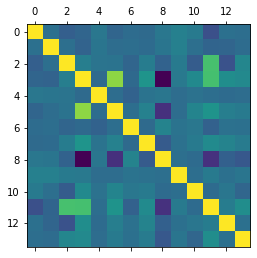

In [53]:
# plot correlation
plt.matshow(df_combo.corr())
plt.show()

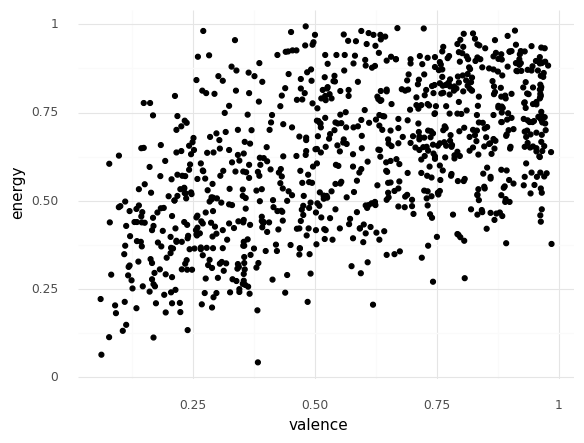

<ggplot: (8782609281049)>

In [54]:
(ggplot(df_combo, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal())

In [99]:
# valence and energy values
valence_energy = ["name", "valence", "energy"]

In [100]:
large_valence_df = df_combo.nlargest(50, "valence") #highest valence in our entire dataset
large_valence_df

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
58,What a Fool Believes,223867,2,0.758,0.378,8,-15.308,0,0.0449,0.284000,0.000000,0.0490,0.985,120.736,audio_features,2yBVeksU2EtrPJbTu4ZslK,spotify:track:2yBVeksU2EtrPJbTu4ZslK,https://api.spotify.com/v1/tracks/2yBVeksU2Etr...,https://api.spotify.com/v1/audio-analysis/2yBV...,4
13,She Works Hard For The Money,320840,1,0.758,0.638,8,-13.010,0,0.0378,0.004860,0.014100,0.0938,0.984,136.502,audio_features,3FlOciKDqFlTMPeC7t92Qy,spotify:track:3FlOciKDqFlTMPeC7t92Qy,https://api.spotify.com/v1/tracks/3FlOciKDqFlT...,https://api.spotify.com/v1/audio-analysis/3FlO...,4
36,Material Girl,240280,20,0.742,0.883,0,-3.419,1,0.0329,0.333000,0.000008,0.0964,0.978,136.506,audio_features,5pJCPFqScbHTESXDFesPb1,spotify:track:5pJCPFqScbHTESXDFesPb1,https://api.spotify.com/v1/tracks/5pJCPFqScbHT...,https://api.spotify.com/v1/audio-analysis/5pJC...,4
75,Addicted To Love,363640,3,0.702,0.578,2,-13.415,1,0.0310,0.382000,0.000006,0.0425,0.975,111.617,audio_features,5izGeTxueiFX1UPFGohY9w,spotify:track:5izGeTxueiFX1UPFGohY9w,https://api.spotify.com/v1/tracks/5izGeTxueiFX...,https://api.spotify.com/v1/audio-analysis/5izG...,4
16,Bad Girls,295107,2,0.857,0.700,2,-14.506,0,0.0358,0.003870,0.016400,0.4110,0.973,120.529,audio_features,1ibRqifchaAfeNdQGpbRVW,spotify:track:1ibRqifchaAfeNdQGpbRVW,https://api.spotify.com/v1/tracks/1ibRqifchaAf...,https://api.spotify.com/v1/audio-analysis/1ibR...,4
90,Hungry Heart,199453,6,0.641,0.894,8,-7.410,1,0.0273,0.085700,0.009000,0.1570,0.972,109.823,audio_features,1KsI8NEeAna8ZIdojI3FiT,spotify:track:1KsI8NEeAna8ZIdojI3FiT,https://api.spotify.com/v1/tracks/1KsI8NEeAna8...,https://api.spotify.com/v1/audio-analysis/1KsI...,4
19,Rasputin - Single Version,220733,5,0.694,0.719,6,-12.734,0,0.0480,0.470000,0.001210,0.4400,0.972,126.212,audio_features,67hbP9PFQZrb4XZc3TzB0s,spotify:track:67hbP9PFQZrb4XZc3TzB0s,https://api.spotify.com/v1/tracks/67hbP9PFQZrb...,https://api.spotify.com/v1/audio-analysis/67hb...,4
39,Start Me Up - Remastered 2009,213067,1,0.631,0.932,5,-4.142,1,0.0354,0.043600,0.137000,0.0918,0.971,122.429,audio_features,7HKez549fwJQDzx3zLjHKC,spotify:track:7HKez549fwJQDzx3zLjHKC,https://api.spotify.com/v1/tracks/7HKez549fwJQ...,https://api.spotify.com/v1/audio-analysis/7HKe...,4
62,Hurts So Good,218960,1,0.785,0.737,9,-5.306,1,0.0363,0.042000,0.000107,0.1080,0.971,125.447,audio_features,67eX1ovaHyVPUinMHeUtIM,spotify:track:67eX1ovaHyVPUinMHeUtIM,https://api.spotify.com/v1/tracks/67eX1ovaHyVP...,https://api.spotify.com/v1/audio-analysis/67eX...,4
39,Like a Virgin,218627,3,0.771,0.655,3,-10.842,0,0.0372,0.152000,0.001970,0.0685,0.970,119.747,audio_features,1ZPlNanZsJSPK5h9YZZFbZ,spotify:track:1ZPlNanZsJSPK5h9YZZFbZ,https://api.spotify.com/v1/tracks/1ZPlNanZsJSP...,https://api.spotify.com/v1/audio-analysis/1ZPl...,4


In [103]:
# only want valence and energy info
large_valence = large_valence_df[valence_energy]
large_valence

,name,valence,energy
58,What a Fool Believes,0.985,0.378
13,She Works Hard For The Money,0.984,0.638
36,Material Girl,0.978,0.883
75,Addicted To Love,0.975,0.578
16,Bad Girls,0.973,0.700
90,Hungry Heart,0.972,0.894
19,Rasputin - Single Version,0.972,0.719
39,Start Me Up - Remastered 2009,0.971,0.932
62,Hurts So Good,0.971,0.737
39,Like a Virgin,0.970,0.655


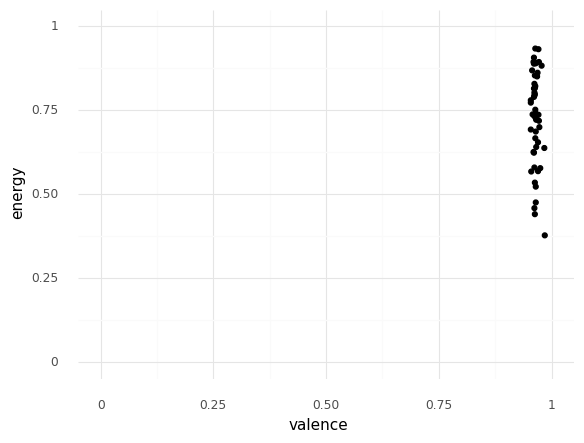

<ggplot: (8782609816341)>

In [98]:
(ggplot(large_valence_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [91]:
large_energy_df = df_combo.nlargest(50, "energy") #highest energy in our entire dataset
large_energy_df

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
97,We Got The Beat,153133,6,0.587,0.994,2,-5.610,1,0.0450,0.155000,0.073400,0.0319,0.481,151.941,audio_features,5kz9GDBTX846OXwqWoyKzF,spotify:track:5kz9GDBTX846OXwqWoyKzF,https://api.spotify.com/v1/tracks/5kz9GDBTX846...,https://api.spotify.com/v1/audio-analysis/5kz9...,4
96,Suedehead - 2011 Remaster,235520,7,0.529,0.989,2,-4.500,1,0.0420,0.001260,0.001480,0.0567,0.669,142.290,audio_features,76HJoPhDFxD7rizsbCmZND,spotify:track:76HJoPhDFxD7rizsbCmZND,https://api.spotify.com/v1/tracks/76HJoPhDFxD7...,https://api.spotify.com/v1/audio-analysis/76HJ...,4
86,Tell It to My Heart,220880,1,0.638,0.988,1,-5.042,1,0.0921,0.030200,0.000012,0.3710,0.723,117.955,audio_features,3YVPpVJvJG2EauXurPA90F,spotify:track:3YVPpVJvJG2EauXurPA90F,https://api.spotify.com/v1/tracks/3YVPpVJvJG2E...,https://api.spotify.com/v1/audio-analysis/3YVP...,4
6,Dude (Looks Like A Lady),265773,5,0.540,0.982,4,-2.962,0,0.0458,0.435000,0.000034,0.0457,0.910,126.294,audio_features,6gQUbFwwdYXlKdmqRoWKJe,spotify:track:6gQUbFwwdYXlKdmqRoWKJe,https://api.spotify.com/v1/tracks/6gQUbFwwdYXl...,https://api.spotify.com/v1/audio-analysis/6gQU...,4
14,Kickstart My Heart,282653,5,0.359,0.981,7,-3.622,0,0.3030,0.001250,0.002360,0.2840,0.271,178.980,audio_features,7GonnnalI2s19OCQO1J7Tf,spotify:track:7GonnnalI2s19OCQO1J7Tf,https://api.spotify.com/v1/tracks/7GonnnalI2s1...,https://api.spotify.com/v1/audio-analysis/7Gon...,4
62,Smooth Criminal - 2012 Remaster,257760,10,0.853,0.981,8,-3.947,1,0.0751,0.247000,0.468000,0.3060,0.595,118.193,audio_features,2bCQHF9gdG5BNDVuEIEnNk,spotify:track:2bCQHF9gdG5BNDVuEIEnNk,https://api.spotify.com/v1/tracks/2bCQHF9gdG5B...,https://api.spotify.com/v1/audio-analysis/2bCQ...,4
60,Panama - 2015 Remaster,210227,3,0.526,0.978,8,-5.436,1,0.1080,0.001220,0.000048,0.0744,0.451,141.167,audio_features,05RgAMGypEvqhNs5hPCbMS,spotify:track:05RgAMGypEvqhNs5hPCbMS,https://api.spotify.com/v1/tracks/05RgAMGypEvq...,https://api.spotify.com/v1/audio-analysis/05Rg...,4
71,Next To You,171973,1,0.407,0.975,4,-6.181,0,0.0666,0.045400,0.000013,0.0837,0.610,175.246,audio_features,7HjipY3Vy2HAN11D2juKHT,spotify:track:7HjipY3Vy2HAN11D2juKHT,https://api.spotify.com/v1/tracks/7HjipY3Vy2HA...,https://api.spotify.com/v1/audio-analysis/7Hji...,4
88,Bad Reputation,169187,1,0.378,0.974,6,-4.055,1,0.1940,0.001920,0.013900,0.0588,0.824,203.715,audio_features,7pu8AhGUxHZSCWTkQ2eb5M,spotify:track:7pu8AhGUxHZSCWTkQ2eb5M,https://api.spotify.com/v1/tracks/7pu8AhGUxHZS...,https://api.spotify.com/v1/audio-analysis/7pu8...,4
44,Bad Medicine,316707,2,0.555,0.973,9,-3.804,1,0.0350,0.048000,0.000000,0.0853,0.805,118.642,audio_features,72hcFp4tYkd3dbNA9dZ3Pv,spotify:track:72hcFp4tYkd3dbNA9dZ3Pv,https://api.spotify.com/v1/tracks/72hcFp4tYkd3...,https://api.spotify.com/v1/audio-analysis/72hc...,4


In [104]:
# only want valence and energy info
large_energy = large_energy_df[valence_energy]
large_energy

,name,valence,energy
97,We Got The Beat,0.481,0.994
96,Suedehead - 2011 Remaster,0.669,0.989
86,Tell It to My Heart,0.723,0.988
6,Dude (Looks Like A Lady),0.910,0.982
14,Kickstart My Heart,0.271,0.981
62,Smooth Criminal - 2012 Remaster,0.595,0.981
60,Panama - 2015 Remaster,0.451,0.978
71,Next To You,0.610,0.975
88,Bad Reputation,0.824,0.974
44,Bad Medicine,0.805,0.973


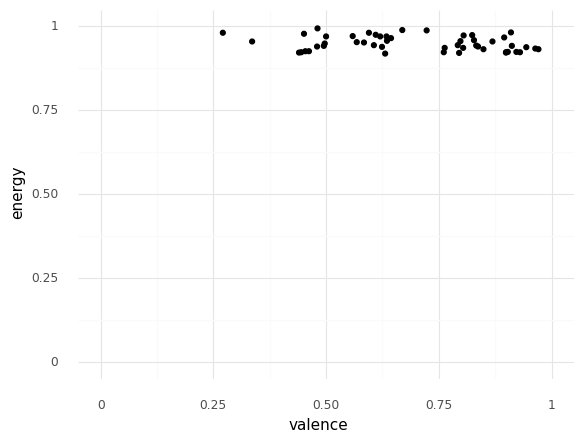

<ggplot: (8782604548573)>

In [97]:
(ggplot(large_energy_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [89]:
small_valence_df = df_combo.nsmallest(50, "valence") #smallest valence in our entire dataset
small_valence_df

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Hello,246933,8,0.424,0.2220,9,-15.053,0,0.0391,0.646000,0.000000,0.1480,0.0606,61.648,audio_features,6HMvJcdw6qLsyV1b5x29sa,spotify:track:6HMvJcdw6qLsyV1b5x29sa,https://api.spotify.com/v1/tracks/6HMvJcdw6qLs...,https://api.spotify.com/v1/audio-analysis/6HMv...,4
24,Sometimes It Snows in April,409000,12,0.494,0.0644,4,-23.939,1,0.0402,0.833000,0.000000,0.0969,0.0622,103.757,audio_features,1Az0fhiWi0EVS4cZ3FF20X,spotify:track:1Az0fhiWi0EVS4cZ3FF20X,https://api.spotify.com/v1/tracks/1Az0fhiWi0EV...,https://api.spotify.com/v1/audio-analysis/1Az0...,4
71,Blue Spanish Sky,238400,6,0.399,0.1140,9,-24.116,0,0.0370,0.709000,0.480000,0.1250,0.0780,113.769,audio_features,7ybeQwgAVDbKdfYvQnXHI4,spotify:track:7ybeQwgAVDbKdfYvQnXHI4,https://api.spotify.com/v1/tracks/7ybeQwgAVDbK...,https://api.spotify.com/v1/audio-analysis/7ybe...,3
95,Still Loving You,403453,7,0.282,0.6050,6,-4.916,0,0.0294,0.004700,0.001440,0.1030,0.0783,103.929,audio_features,0RdUX4WE0fO30VnlUbDVL6,spotify:track:0RdUX4WE0fO30VnlUbDVL6,https://api.spotify.com/v1/tracks/0RdUX4WE0fO3...,https://api.spotify.com/v1/audio-analysis/0RdU...,4
0,Older,333107,3,0.572,0.4390,5,-10.377,1,0.0258,0.147000,0.000379,0.0612,0.0794,147.741,audio_features,1oMNeGkqwyEOLMUTrgdIr2,spotify:track:1oMNeGkqwyEOLMUTrgdIr2,https://api.spotify.com/v1/tracks/1oMNeGkqwyEO...,https://api.spotify.com/v1/audio-analysis/1oMN...,4
27,One More Try - Remastered,350667,4,0.551,0.2910,5,-12.544,1,0.0283,0.434000,0.000038,0.1100,0.0823,119.005,audio_features,5932kbyNt445gDTT2chRUS,spotify:track:5932kbyNt445gDTT2chRUS,https://api.spotify.com/v1/tracks/5932kbyNt445...,https://api.spotify.com/v1/audio-analysis/5932...,3
22,Babe,265973,3,0.267,0.2040,2,-13.714,1,0.0317,0.527000,0.000000,0.0924,0.0903,169.486,audio_features,5W7YROOF6bFfBexY81LFjt,spotify:track:5W7YROOF6bFfBexY81LFjt,https://api.spotify.com/v1/tracks/5W7YROOF6bFf...,https://api.spotify.com/v1/audio-analysis/5W7Y...,4
10,You Are So Beautiful,159640,7,0.297,0.1820,1,-10.944,1,0.0298,0.846000,0.002670,0.1340,0.0920,83.391,audio_features,1gJOqXpRjz9GeEEwQpcujK,spotify:track:1gJOqXpRjz9GeEEwQpcujK,https://api.spotify.com/v1/tracks/1gJOqXpRjz9G...,https://api.spotify.com/v1/audio-analysis/1gJO...,3
86,Going Home (Theme of the Local Hero),299000,14,0.289,0.4820,2,-9.930,1,0.0309,0.117000,0.866000,0.0897,0.0979,109.756,audio_features,7GSdZuDoJhylAnHAIbQph3,spotify:track:7GSdZuDoJhylAnHAIbQph3,https://api.spotify.com/v1/tracks/7GSdZuDoJhyl...,https://api.spotify.com/v1/audio-analysis/7GSd...,4
40,Silent Lucidity - Remastered 2003,347760,8,0.462,0.6280,7,-5.659,1,0.0274,0.053400,0.000250,0.1200,0.0981,140.049,audio_features,6OSyCAmXT4Gkd3OQ2aPOaF,spotify:track:6OSyCAmXT4Gkd3OQ2aPOaF,https://api.spotify.com/v1/tracks/6OSyCAmXT4Gk...,https://api.spotify.com/v1/audio-analysis/6OSy...,4


In [105]:
# only want valence and energy info
small_valence = small_valence_df[valence_energy]
small_valence

,name,valence,energy
0,Hello,0.0606,0.2220
24,Sometimes It Snows in April,0.0622,0.0644
71,Blue Spanish Sky,0.0780,0.1140
95,Still Loving You,0.0783,0.6050
0,Older,0.0794,0.4390
27,One More Try - Remastered,0.0823,0.2910
22,Babe,0.0903,0.2040
10,You Are So Beautiful,0.0920,0.1820
86,Going Home (Theme of the Local Hero),0.0979,0.4820
40,Silent Lucidity - Remastered 2003,0.0981,0.6280


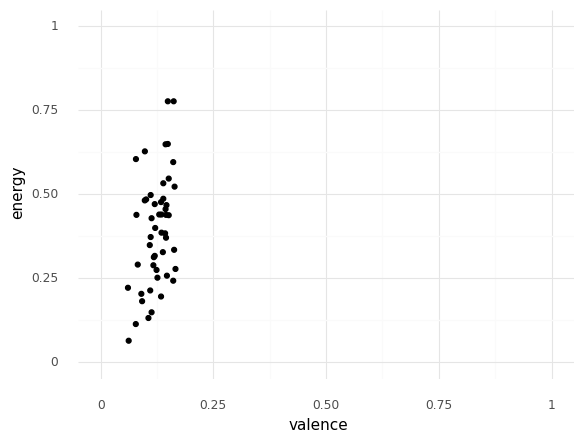

<ggplot: (8782611196965)>

In [96]:
(ggplot(small_valence_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [87]:
small_energy_df = df_combo.nsmallest(50, "energy") #smallest energy in our entire dataset
small_energy_df

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
70,Longer,195067,8,0.308,0.0427,7,-24.709,1,0.0336,0.8650,0.000000,0.1790,0.3830,158.399,audio_features,56ilrbKJF2bph5W6eZaM5E,spotify:track:56ilrbKJF2bph5W6eZaM5E,https://api.spotify.com/v1/tracks/56ilrbKJF2bp...,https://api.spotify.com/v1/audio-analysis/56il...,4
24,Sometimes It Snows in April,409000,12,0.494,0.0644,4,-23.939,1,0.0402,0.8330,0.000000,0.0969,0.0622,103.757,audio_features,1Az0fhiWi0EVS4cZ3FF20X,spotify:track:1Az0fhiWi0EVS4cZ3FF20X,https://api.spotify.com/v1/tracks/1Az0fhiWi0EV...,https://api.spotify.com/v1/audio-analysis/1Az0...,4
1,This Woman's Work,214000,10,0.353,0.1130,8,-18.752,1,0.0399,0.8880,0.000048,0.1210,0.1690,128.304,audio_features,6FN08oB3MT2BxYIJoR1CZ5,spotify:track:6FN08oB3MT2BxYIJoR1CZ5,https://api.spotify.com/v1/tracks/6FN08oB3MT2B...,https://api.spotify.com/v1/audio-analysis/6FN0...,4
71,Blue Spanish Sky,238400,6,0.399,0.1140,9,-24.116,0,0.0370,0.7090,0.480000,0.1250,0.0780,113.769,audio_features,7ybeQwgAVDbKdfYvQnXHI4,spotify:track:7ybeQwgAVDbKdfYvQnXHI4,https://api.spotify.com/v1/tracks/7ybeQwgAVDbK...,https://api.spotify.com/v1/audio-analysis/7ybe...,3
26,Why Worry?,509067,5,0.591,0.1320,4,-21.243,1,0.0296,0.9340,0.553000,0.2710,0.1060,93.714,audio_features,0NL5lqKSd0obXvKwfvyTKw,spotify:track:0NL5lqKSd0obXvKwfvyTKw,https://api.spotify.com/v1/tracks/0NL5lqKSd0ob...,https://api.spotify.com/v1/audio-analysis/0NL5...,4
32,More Than Words,334107,5,0.626,0.1340,6,-14.898,1,0.0298,0.4670,0.000000,0.1130,0.2390,91.893,audio_features,1gVgkQFOKa8Wc1HYsJtPdH,spotify:track:1gVgkQFOKa8Wc1HYsJtPdH,https://api.spotify.com/v1/tracks/1gVgkQFOKa8W...,https://api.spotify.com/v1/audio-analysis/1gVg...,4
41,I Can't Make You Love Me,332960,3,0.588,0.1490,7,-16.728,0,0.0319,0.8460,0.000097,0.2360,0.1130,124.689,audio_features,69uJi5QsBtqlYkGURTBli8,spotify:track:69uJi5QsBtqlYkGURTBli8,https://api.spotify.com/v1/tracks/69uJi5QsBtql...,https://api.spotify.com/v1/audio-analysis/69uJ...,4
10,You Are So Beautiful,159640,7,0.297,0.1820,1,-10.944,1,0.0298,0.8460,0.002670,0.1340,0.0920,83.391,audio_features,1gJOqXpRjz9GeEEwQpcujK,spotify:track:1gJOqXpRjz9GeEEwQpcujK,https://api.spotify.com/v1/tracks/1gJOqXpRjz9G...,https://api.spotify.com/v1/audio-analysis/1gJO...,3
73,There's No Easy Way,227293,7,0.563,0.1840,8,-16.386,1,0.0417,0.6890,0.000000,0.1290,0.1940,128.048,audio_features,7ePEIbrsRXk9En7noiLAo7,spotify:track:7ePEIbrsRXk9En7noiLAo7,https://api.spotify.com/v1/tracks/7ePEIbrsRXk9...,https://api.spotify.com/v1/audio-analysis/7ePE...,4
33,Running To Stand Still - Remastered 2007,257187,5,0.319,0.1850,2,-19.074,1,0.0363,0.8730,0.040700,0.3240,0.2240,188.495,audio_features,6TqD3tjgPr4zcF7PTEey7I,spotify:track:6TqD3tjgPr4zcF7PTEey7I,https://api.spotify.com/v1/tracks/6TqD3tjgPr4z...,https://api.spotify.com/v1/audio-analysis/6TqD...,4


In [106]:
# only want valence and energy info
small_energy = small_energy_df[valence_energy]
small_energy

,name,valence,energy
70,Longer,0.3830,0.0427
24,Sometimes It Snows in April,0.0622,0.0644
1,This Woman's Work,0.1690,0.1130
71,Blue Spanish Sky,0.0780,0.1140
26,Why Worry?,0.1060,0.1320
32,More Than Words,0.2390,0.1340
41,I Can't Make You Love Me,0.1130,0.1490
10,You Are So Beautiful,0.0920,0.1820
73,There's No Easy Way,0.1940,0.1840
33,Running To Stand Still - Remastered 2007,0.2240,0.1850


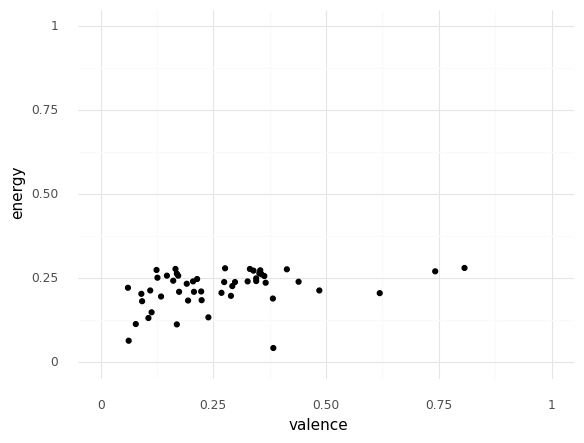

<ggplot: (8782607494721)>

In [95]:
(ggplot(small_energy_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [63]:
df_combo.nlargest(10, ['valence', 'energy'])

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
58,What a Fool Believes,223867,2,0.758,0.378,8,-15.308,0,0.0449,0.28400,0.000000,0.0490,0.985,120.736,audio_features,2yBVeksU2EtrPJbTu4ZslK,spotify:track:2yBVeksU2EtrPJbTu4ZslK,https://api.spotify.com/v1/tracks/2yBVeksU2Etr...,https://api.spotify.com/v1/audio-analysis/2yBV...,4
13,She Works Hard For The Money,320840,1,0.758,0.638,8,-13.010,0,0.0378,0.00486,0.014100,0.0938,0.984,136.502,audio_features,3FlOciKDqFlTMPeC7t92Qy,spotify:track:3FlOciKDqFlTMPeC7t92Qy,https://api.spotify.com/v1/tracks/3FlOciKDqFlT...,https://api.spotify.com/v1/audio-analysis/3FlO...,4
36,Material Girl,240280,20,0.742,0.883,0,-3.419,1,0.0329,0.33300,0.000008,0.0964,0.978,136.506,audio_features,5pJCPFqScbHTESXDFesPb1,spotify:track:5pJCPFqScbHTESXDFesPb1,https://api.spotify.com/v1/tracks/5pJCPFqScbHT...,https://api.spotify.com/v1/audio-analysis/5pJC...,4
75,Addicted To Love,363640,3,0.702,0.578,2,-13.415,1,0.0310,0.38200,0.000006,0.0425,0.975,111.617,audio_features,5izGeTxueiFX1UPFGohY9w,spotify:track:5izGeTxueiFX1UPFGohY9w,https://api.spotify.com/v1/tracks/5izGeTxueiFX...,https://api.spotify.com/v1/audio-analysis/5izG...,4
16,Bad Girls,295107,2,0.857,0.700,2,-14.506,0,0.0358,0.00387,0.016400,0.4110,0.973,120.529,audio_features,1ibRqifchaAfeNdQGpbRVW,spotify:track:1ibRqifchaAfeNdQGpbRVW,https://api.spotify.com/v1/tracks/1ibRqifchaAf...,https://api.spotify.com/v1/audio-analysis/1ibR...,4
90,Hungry Heart,199453,6,0.641,0.894,8,-7.410,1,0.0273,0.08570,0.009000,0.1570,0.972,109.823,audio_features,1KsI8NEeAna8ZIdojI3FiT,spotify:track:1KsI8NEeAna8ZIdojI3FiT,https://api.spotify.com/v1/tracks/1KsI8NEeAna8...,https://api.spotify.com/v1/audio-analysis/1KsI...,4
19,Rasputin - Single Version,220733,5,0.694,0.719,6,-12.734,0,0.0480,0.47000,0.001210,0.4400,0.972,126.212,audio_features,67hbP9PFQZrb4XZc3TzB0s,spotify:track:67hbP9PFQZrb4XZc3TzB0s,https://api.spotify.com/v1/tracks/67hbP9PFQZrb...,https://api.spotify.com/v1/audio-analysis/67hb...,4
39,Start Me Up - Remastered 2009,213067,1,0.631,0.932,5,-4.142,1,0.0354,0.04360,0.137000,0.0918,0.971,122.429,audio_features,7HKez549fwJQDzx3zLjHKC,spotify:track:7HKez549fwJQDzx3zLjHKC,https://api.spotify.com/v1/tracks/7HKez549fwJQ...,https://api.spotify.com/v1/audio-analysis/7HKe...,4
62,Hurts So Good,218960,1,0.785,0.737,9,-5.306,1,0.0363,0.04200,0.000107,0.1080,0.971,125.447,audio_features,67eX1ovaHyVPUinMHeUtIM,spotify:track:67eX1ovaHyVPUinMHeUtIM,https://api.spotify.com/v1/tracks/67eX1ovaHyVP...,https://api.spotify.com/v1/audio-analysis/67eX...,4
39,Like a Virgin,218627,3,0.771,0.655,3,-10.842,0,0.0372,0.15200,0.001970,0.0685,0.970,119.747,audio_features,1ZPlNanZsJSPK5h9YZZFbZ,spotify:track:1ZPlNanZsJSPK5h9YZZFbZ,https://api.spotify.com/v1/tracks/1ZPlNanZsJSP...,https://api.spotify.com/v1/audio-analysis/1ZPl...,4


In [64]:
df_combo.nsmallest(10, ['valence', 'energy'])

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Hello,246933,8,0.424,0.2220,9,-15.053,0,0.0391,0.6460,0.000000,0.1480,0.0606,61.648,audio_features,6HMvJcdw6qLsyV1b5x29sa,spotify:track:6HMvJcdw6qLsyV1b5x29sa,https://api.spotify.com/v1/tracks/6HMvJcdw6qLs...,https://api.spotify.com/v1/audio-analysis/6HMv...,4
24,Sometimes It Snows in April,409000,12,0.494,0.0644,4,-23.939,1,0.0402,0.8330,0.000000,0.0969,0.0622,103.757,audio_features,1Az0fhiWi0EVS4cZ3FF20X,spotify:track:1Az0fhiWi0EVS4cZ3FF20X,https://api.spotify.com/v1/tracks/1Az0fhiWi0EV...,https://api.spotify.com/v1/audio-analysis/1Az0...,4
71,Blue Spanish Sky,238400,6,0.399,0.1140,9,-24.116,0,0.0370,0.7090,0.480000,0.1250,0.0780,113.769,audio_features,7ybeQwgAVDbKdfYvQnXHI4,spotify:track:7ybeQwgAVDbKdfYvQnXHI4,https://api.spotify.com/v1/tracks/7ybeQwgAVDbK...,https://api.spotify.com/v1/audio-analysis/7ybe...,3
95,Still Loving You,403453,7,0.282,0.6050,6,-4.916,0,0.0294,0.0047,0.001440,0.1030,0.0783,103.929,audio_features,0RdUX4WE0fO30VnlUbDVL6,spotify:track:0RdUX4WE0fO30VnlUbDVL6,https://api.spotify.com/v1/tracks/0RdUX4WE0fO3...,https://api.spotify.com/v1/audio-analysis/0RdU...,4
0,Older,333107,3,0.572,0.4390,5,-10.377,1,0.0258,0.1470,0.000379,0.0612,0.0794,147.741,audio_features,1oMNeGkqwyEOLMUTrgdIr2,spotify:track:1oMNeGkqwyEOLMUTrgdIr2,https://api.spotify.com/v1/tracks/1oMNeGkqwyEO...,https://api.spotify.com/v1/audio-analysis/1oMN...,4
27,One More Try - Remastered,350667,4,0.551,0.2910,5,-12.544,1,0.0283,0.4340,0.000038,0.1100,0.0823,119.005,audio_features,5932kbyNt445gDTT2chRUS,spotify:track:5932kbyNt445gDTT2chRUS,https://api.spotify.com/v1/tracks/5932kbyNt445...,https://api.spotify.com/v1/audio-analysis/5932...,3
22,Babe,265973,3,0.267,0.2040,2,-13.714,1,0.0317,0.5270,0.000000,0.0924,0.0903,169.486,audio_features,5W7YROOF6bFfBexY81LFjt,spotify:track:5W7YROOF6bFfBexY81LFjt,https://api.spotify.com/v1/tracks/5W7YROOF6bFf...,https://api.spotify.com/v1/audio-analysis/5W7Y...,4
10,You Are So Beautiful,159640,7,0.297,0.1820,1,-10.944,1,0.0298,0.8460,0.002670,0.1340,0.0920,83.391,audio_features,1gJOqXpRjz9GeEEwQpcujK,spotify:track:1gJOqXpRjz9GeEEwQpcujK,https://api.spotify.com/v1/tracks/1gJOqXpRjz9G...,https://api.spotify.com/v1/audio-analysis/1gJO...,3
86,Going Home (Theme of the Local Hero),299000,14,0.289,0.4820,2,-9.930,1,0.0309,0.1170,0.866000,0.0897,0.0979,109.756,audio_features,7GSdZuDoJhylAnHAIbQph3,spotify:track:7GSdZuDoJhylAnHAIbQph3,https://api.spotify.com/v1/tracks/7GSdZuDoJhyl...,https://api.spotify.com/v1/audio-analysis/7GSd...,4
40,Silent Lucidity - Remastered 2003,347760,8,0.462,0.6280,7,-5.659,1,0.0274,0.0534,0.000250,0.1200,0.0981,140.049,audio_features,6OSyCAmXT4Gkd3OQ2aPOaF,spotify:track:6OSyCAmXT4Gkd3OQ2aPOaF,https://api.spotify.com/v1/tracks/6OSyCAmXT4Gk...,https://api.spotify.com/v1/audio-analysis/6OSy...,4
